In [1]:
import IPython
import pandas as pd
from decimal import Decimal
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz

#for visualising decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#for cross validation
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


#for Naive Bayes
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [115]:
def plthistogram(dataset, feature1, feature2, label_f1, label_f2, xlabel, ylabel, title):
    plt.hist(dataset[[feature1, feature2]].values,label = [label_f1, label_f2],normed=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_correlation(dataset, feature1, feature1n1, label_f1, label_f2, feature2, feature2n2, xlabel, ylabel,title):
    plt.bar(dataset[feature1], dataset[feature1n1], label = label_f1)
    plt.bar(dataset[feature2], dataset[feature2n2], label = label_f2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()
    
def cross_validate(dataset,predictors, target, dtclf):
    X=dataset[predictors]
    Y=dataset[target]
    dtclf.fit(X,Y)
    dtclf = DecisionTreeClassifier(criterion='entropy',max_depth=5,
    min_samples_split=20, random_state=99)

    crossvalidation = KFold( shuffle=True,
    random_state=1)    
    score = np.mean(cross_val_score(dtclf, X, Y, scoring='accuracy',
    cv=crossvalidation, n_jobs=1))
    return score

def classify_with_NaiveBayes(clf, features, target, train, test):
    clf.fit(train[features].values, train[target])
    predCLF = clf.predict(test[features])
    return 100 * (1-(test[target] != predCLF).sum() / test.shape[0])

def create_confusion_matrix(clf, features, target, train, test):
    clf.fit(train[features].values, train[target])
    predCLF = clf.predict(test[features])
    return pd.crosstab(test[target], predCLF, rownames=['Actual'], colnames=['Predictions'])

In [116]:
data = pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2016-17.csv')
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,13/08/2016,Burnley,Swansea,0,1,A,0,0,D,...,1.61,32,-0.25,2.13,2.06,1.86,1.81,2.79,3.16,2.89
1,E0,13/08/2016,Crystal Palace,West Brom,0,1,A,0,0,D,...,1.52,33,-0.50,2.07,2.00,1.90,1.85,2.25,3.15,3.86
2,E0,13/08/2016,Everton,Tottenham,1,1,D,1,0,H,...,1.77,32,0.25,1.91,1.85,2.09,2.00,3.64,3.54,2.16
3,E0,13/08/2016,Hull,Leicester,2,1,H,1,0,H,...,1.67,31,0.25,2.35,2.26,2.03,1.67,4.68,3.50,1.92
4,E0,13/08/2016,Man City,Sunderland,2,1,H,1,0,H,...,2.48,34,-1.50,1.81,1.73,2.20,2.14,1.25,6.50,14.50


In [117]:
matches = len(data)
print('All matches in 2016-17 season in the English Premier League: ', matches)

total_goals = sum(data['FTHG']) + sum(data['FTAG'])
avg_goals = Decimal(total_goals / matches)
print ('Average goals per games: ',round(avg_goals,2))

num_goals_scored_home = sum(data['FTHG'])
print ('Number of goals scored home: ', num_goals_scored_home)
avg_goals_home = Decimal(num_goals_scored_home / matches)
print ('Average goals scored home / game: ',round(avg_goals_home,2))   
                            
num_goals_scored_away = sum(data['FTAG'])
print ('Number of goals scored away: ',num_goals_scored_away)
avg_goals_away = Decimal(num_goals_scored_away / matches)
print ('Average goals scored away / game: ',round(avg_goals_away,2))   
                            
num_home_wins = data[data['FTR'] == 'H']
print ('Number of home wins: ',len(num_home_wins))
avg_home_wins = len(num_home_wins) / matches * 100
print ('Percentage of home wins: ',round(avg_home_wins,2),'%')

num_away_wins = data[data['FTR'] == 'A']
print ('Number of away wins: ',len(num_away_wins))
avg_away_wins = len(num_away_wins) / matches * 100
print ('Percentage of home wins: ',round(avg_away_wins,2),'%')
teams = data['HomeTeam'].unique().tolist()

All matches in 2016-17 season in the English Premier League:  380
Average goals per games:  2.80
Number of goals scored home:  607
Average goals scored home / game:  1.60
Number of goals scored away:  457
Average goals scored away / game:  1.20
Number of home wins:  187
Percentage of home wins:  49.21 %
Number of away wins:  109
Percentage of home wins:  28.68 %


In [118]:
##compare shots accuracy when playing home vs playing away. Is  there a difference?
#answer: the home team has to create less chances to score so they're more accurate
total_away_shots_on_target = sum(data['AST'])
total_home_shots_on_target = sum(data['HST'])

away_score_accuracy = round(total_away_shots_on_target / num_goals_scored_away,2)
print ('Away scoring accuracy: ',away_score_accuracy)
home_score_accuracy = round(total_home_shots_on_target / num_goals_scored_home,2)
print ('Home scoring accuracy: ',home_score_accuracy)

Away scoring accuracy:  3.21
Home scoring accuracy:  3.01


In [119]:
def getTeamData(team):
    home_matches = data[data['HomeTeam']==team]
    total_home_goals_for_team = home_matches['FTHG'].sum()
    avg_home_goals_for_team = total_home_goals_for_team / len(home_matches)
    
    away_matches = data[data['AwayTeam']==team]
    total_away_goals_for_team = away_matches['FTAG'].sum()
    avg_away_goals_for_team = total_away_goals_for_team / len(away_matches)
    
    total_home_shots_on_target = home_matches['HST'].sum()
    avg_home_shots_on_target = total_home_shots_on_target / len(home_matches)
    
    home_accuracy_percentage_for_team = round((avg_home_goals_for_team /avg_home_shots_on_target)*100,2)
    
    total_away_shots_on_target = away_matches['AST'].sum()
    avg_away_shots_on_target = total_away_shots_on_target / len(away_matches)
    
    away_accuracy_percentage_for_team = round((avg_away_goals_for_team /avg_away_shots_on_target)*100,2) 
    avg_acc_of_team = round((home_accuracy_percentage_for_team + away_accuracy_percentage_for_team) / 2,2)
    
    return [team, avg_home_goals_for_team, avg_away_goals_for_team, avg_home_shots_on_target, avg_away_shots_on_target, 
            home_accuracy_percentage_for_team, away_accuracy_percentage_for_team, avg_acc_of_team]

all_team_stats = [] 
accuracy_home = []
accuracy_away = []
accuracy_avg = []

for team in teams:
    teams_data = getTeamData(team)
    
    all_team_stats.append(teams_data)
    
    if teams_data[1] > 2.5:
        print ('Team to score over 2.5 goals at home on average: ',team, 'with Average: ',round(teams_data[1],2))
    if teams_data[1] < 1:
        print ('Team to score less than 1 goal at home on average: ',team, 'with Average: ',round(teams_data[1],2))
        
    if teams_data[2] > 1.5:
        print ('Team to score over 1.5 goals away on average: ',team, 'with Average: ',round(teams_data[2],2)) 

        
    accuracy_away.append(float(teams_data[6])) 
    accuracy_home.append(float(teams_data[5])) 
    accuracy_avg.append(float(teams_data[7])) 
    
    if teams_data[6] == max(accuracy_away):
          best_team_away = teams_data[0]
    if teams_data[5] == max(accuracy_home):
         best_team_home = teams_data[0]
            
    if teams_data[6] == min(accuracy_away):
          worst_team_away = teams_data[0]
    if teams_data[5] == min(accuracy_home):
         worst_team_home = teams_data[0]
            
    if teams_data[7] == min(accuracy_avg):
         worst_team_avg = teams_data[0]
    if teams_data[7] == max(accuracy_avg):
         best_team_avg = teams_data[0]
            
print ('\nMost efficient team away: ',best_team_away, 'with Average: ',round(max(accuracy_away),2),'%')  
print ('Most efficient team home: ',best_team_home, 'with Average: ',round(max(accuracy_home),2),'%')  
print ('\nLeast efficient team away: ',worst_team_away, 'with Average: ',round(min(accuracy_away),2),'%')  
print ('Least efficient team home: ',worst_team_home, 'with Average: ',round(min(accuracy_home),2),'%')  
print ('\nLeast efficient team in average: ',worst_team_avg, 'with Average: ',round(min(accuracy_avg),2),'%')  
print ('Most efficient team in average: ',best_team_avg, 'with Average: ',round(max(accuracy_avg),2),'%') 

#test
#print(getTeamData('Liverpool'))
#print(getTeamData('Chelsea'))
#print(getTeamData('Arsenal'))

Team to score over 1.5 goals away on average:  Man City with Average:  2.26
Team to score less than 1 goal at home on average:  Middlesbrough with Average:  0.89
Team to score less than 1 goal at home on average:  Southampton with Average:  0.89
Team to score over 1.5 goals away on average:  Arsenal with Average:  2.0
Team to score over 2.5 goals at home on average:  Chelsea with Average:  2.89
Team to score over 1.5 goals away on average:  Chelsea with Average:  1.58
Team to score over 1.5 goals away on average:  Tottenham with Average:  2.05
Team to score less than 1 goal at home on average:  Sunderland with Average:  0.84
Team to score over 1.5 goals away on average:  Liverpool with Average:  1.74

Most efficient team away:  Arsenal with Average:  44.19 %
Most efficient team home:  Chelsea with Average:  45.45 %

Least efficient team away:  Hull with Average:  15.52 %
Least efficient team home:  Southampton with Average:  18.48 %

Least efficient team in average:  Southampton with A

In [120]:
#check if there's any missing value
print ('Rows with missing values: ',data.isnull().values.any().sum())
missing_value_rows = data[data.isnull().any(1)]
missing_value_rows

Rows with missing values:  0


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA


In [121]:
#delete columns with betting data
wanted_columns = ['Div','Date', 'HomeTeam','AwayTeam', 'FTHG', 'FTAG','FTR','HTHG', 'HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR' ]
column_list = data.columns.values.tolist()
sublist = [x for x in column_list if x in wanted_columns]
mydata = data[sublist]
mydata.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,13/08/2016,Burnley,Swansea,0,1,A,0,0,D,...,3,9,10,14,7,4,3,2,0,0
1,E0,13/08/2016,Crystal Palace,West Brom,0,1,A,0,0,D,...,4,3,12,15,3,6,2,2,0,0
2,E0,13/08/2016,Everton,Tottenham,1,1,D,1,0,H,...,6,4,10,14,5,6,0,0,0,0
3,E0,13/08/2016,Hull,Leicester,2,1,H,1,0,H,...,5,5,8,17,5,3,2,2,0,0
4,E0,13/08/2016,Man City,Sunderland,2,1,H,1,0,H,...,4,3,11,14,9,6,1,2,0,0


In [122]:
mydata.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.597368,1.202632,0.705263,0.510526,14.013158,11.484211,4.813158,3.855263,11.063158,11.657895,5.678947,4.734211,1.744737,1.886842,0.055263,0.052632
std,1.306971,1.227862,0.857974,0.753108,5.878033,5.019462,2.817086,2.383452,3.468853,3.556378,3.084916,2.702562,1.256371,1.301647,0.240050,0.223591
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,9.000000,9.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,4.000000,3.000000,11.000000,12.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,13.000000,14.000000,8.000000,6.000000,3.000000,3.000000,0.000000,0.000000
max,6.000000,7.000000,4.000000,4.000000,37.000000,29.000000,17.000000,15.000000,24.000000,24.000000,19.000000,15.000000,6.000000,6.000000,2.000000,1.000000


In [123]:
#see goals distribution by teams
grouped = mydata.groupby(['HomeTeam', 'FTR'])
grouped.aggregate({'FTHG':np.mean, 'FTAG':np.mean}).head()


FTHG  FTAG
HomeTeam    FTR                
Arsenal     A    2.000000  3.00
            D    1.000000  1.00
            H    2.285714  0.50
Bournemouth A    0.666667  2.50
            D    1.750000  1.75

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


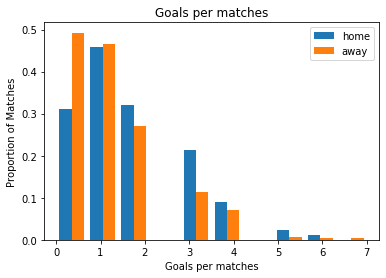

In [124]:
plthistogram(mydata, 'FTHG', 'FTAG', 'home', 'away', 'Goals per matches', 'Proportion of Matches', 'Goals per matches')

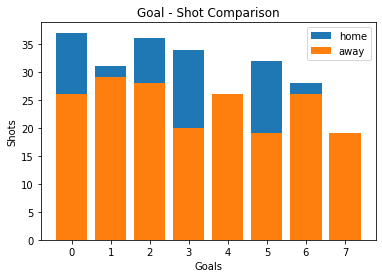

In [125]:
plot_correlation(mydata, 'FTHG', 'HS', 'home','away', 'FTAG', 'AS', 'Goals', 'Shots','Goal - Shot Comparison')

In [126]:
#fill in the missing values with 

#missing_value_rows.fillna(data['WHH'].mean)
values = {'WHH': data['WHH'].mean, 'WHD': data['WHD'].mean, 'WHA': data['WHA'].mean}
data2 = data.fillna(value = values)
print ('Rows with missing values: ',data2.isnull().values.any().sum())


Rows with missing values:  0


In [127]:
lb_HomeTeam = LabelEncoder()


lb_AwayTeam = LabelEncoder()
mydata.head()
exist = False

if (('AwayTeam_numbers' not in mydata.columns) and ('HomeTeam_numbers' not in mydata.columns)):
    exist = True
else:
    del mydata['AwayTeam_numbers']
    del mydata['HomeTeam_numbers']

if exist:
    mydata.insert(22, 'AwayTeam_numbers', lb_HomeTeam.fit_transform(mydata['AwayTeam']))
    mydata.insert(23, 'HomeTeam_numbers', lb_HomeTeam.fit_transform(mydata['HomeTeam']))

if (('AwayTeam_numbers' not in data2.columns) and ('HomeTeam_numbers' not in data2.columns)):
    exist = True
else:
    del data2['AwayTeam_numbers']
    del data2['HomeTeam_numbers']


# add odds back
if exist:
    data2.insert(22, 'AwayTeam_numbers', lb_HomeTeam.fit_transform(mydata['AwayTeam']))
    data2.insert(23, 'HomeTeam_numbers', lb_HomeTeam.fit_transform(mydata['HomeTeam']))

In [128]:
all_col_names = mydata.columns.values.tolist()
predictor_names = all_col_names[10:24]

target = all_col_names[6]
#test
print (all_col_names[23])

HomeTeam_numbers


In [129]:
all_col_names2 = data2.columns.values.tolist()
halftimegoals_predictors_names = all_col_names2[7:9]
predictor_names2 = all_col_names2[10:39] + all_col_names2[43:64] + halftimegoals_predictors_names

#test
print (all_col_names2[9])

HTR


In [130]:
secondhalf_predictor_names = predictor_names + halftimegoals_predictors_names

In [131]:
mydata['is_train'] = np.random.uniform(0,1, len(data)) <= .75
train, test = mydata[mydata['is_train']==True], mydata[mydata['is_train']==False]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, random_state=99)
dt.fit(train[predictor_names], train[target])
preds = dt.predict(test[predictor_names])
pd.crosstab(test['FTR'], preds, rownames=['Actual'], colnames=['Predictions' ])

Predictions,A,D,H
Actual,,,
A,13,5,3
D,8,5,10
H,11,9,27


In [133]:
dt_ht = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, random_state=99)
dt_ht.fit(train[secondhalf_predictor_names], train[target])
preds = dt_ht.predict(test[secondhalf_predictor_names])
pd.crosstab(test['FTR'], preds, rownames=['Actual'], colnames=['Predictions' ])

Predictions,A,D,H
Actual,,,
A,8,10,3
D,1,8,14
H,3,8,36


In [134]:
#split data2
data2['is_train'] = np.random.uniform(0,1, len(data)) <= .75
train, test = data2[data2['is_train']==True], data2[data2['is_train']==False]

dt2 = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, random_state=99)
dt2.fit(train[predictor_names2], train[target])
preds = dt2.predict(test[predictor_names2])
pd.crosstab(test['FTR'], preds, rownames=['Actual'], colnames=['Predictions' ])


Predictions,A,D,H
Actual,,,
A,18,2,4
D,11,5,15
H,3,7,28


In [135]:
#stats
export_graphviz(dt, 'dt.dot', feature_names=predictor_names)

#stats + half time
export_graphviz(dt_ht, 'dt_ht.dot', feature_names=secondhalf_predictor_names)

#stats + half time + betting odds
export_graphviz(dt2, 'dt2.dot', feature_names=predictor_names2)

In [136]:
#stats + half time
score = cross_validate(mydata,secondhalf_predictor_names, target, dt_ht)
print('Accuracy score of the model with Half Time Results but NO betting data: ',score)


Accuracy score of the model with Half Time Results but NO betting data:  0.6210526315789473


In [137]:
#stats 
score = cross_validate(mydata,predictor_names, target, dt)
print('Accuracy score of the model with NO Half Time Results and NO betting data: ',score)

Accuracy score of the model with NO Half Time Results and NO betting data:  0.5473684210526316


In [138]:
#stats + half time + betting odds
score = cross_validate(data2,predictor_names2, target, dt2)
print('Accuracy score of the model with stats, Half Time Results AND betting data: ',score)

Accuracy score of the model with stats, Half Time Results AND betting data:  0.6105263157894737


In [139]:
gnb =  GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

features = ['HomeTeam_numbers','AwayTeam_numbers', 'FTHG','FTAG', 'HTAG', 'HTHG','HS', 'AS','HST','AST', 'HC','AC', 'HF','AF', 
            'HY','AY', 'HR','AR']
target = 'FTR'
print('Gaussian Naive Bayes Performance: ',classify_with_NaiveBayes(gnb, features, target, train, test))
print('Multinomial Naive Bayes Performance: ',classify_with_NaiveBayes(mnb, features, target, train, test))
print('Bernoulli Naive Bayes Performance: ',classify_with_NaiveBayes(bnb, features, target, train, test))

Gaussian Naive Bayes Performance:  80.64516129032258
Multinomial Naive Bayes Performance:  75.26881720430107
Bernoulli Naive Bayes Performance:  78.49462365591397


In [140]:
#Gaussian
create_confusion_matrix(gnb, features, target, train, test)

Predictions,A,D,H
Actual,,,
A,23,1,0
D,9,17,5
H,2,1,35


In [141]:

#Multinomial
create_confusion_matrix(mnb, features, target, train, test)

Predictions,A,D,H
Actual,,,
A,22,2,0
D,10,15,6
H,2,3,33


In [142]:
#Beroulli
create_confusion_matrix(bnb, features, target, train, test)

Predictions,A,D,H
Actual,,,
A,21,0,3
D,6,16,9
H,2,0,36


In [143]:
mean_ftr_home_win =np.mean(train['FTR']=='H')
mean_ftr_away_win =np.mean(train['FTR']=='A')
mean_ftr_draw =np.mean(train['FTR']=='D')
print('Probability of Home win',round(100 * mean_ftr_home_win,2),'%')
print('Probability of Away win',round(100 * mean_ftr_away_win,2),'%')
print('Probability of Draw',round(100 * mean_ftr_draw,2),'%')

Probability of Home win 51.92 %
Probability of Away win 29.62 %
Probability of Draw 18.47 %
